<a href="https://colab.research.google.com/github/KaiqiangZheng/4SC3/blob/master/4SC3_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaiqiang Zheng 400175602
#My Github:https://github.com/KaiqiangZheng/4SC3

In [ ]:
#Kaiqiang Zheng 400175602
#!pip install pandas
import pandas as pd
import io
from matplotlib import pyplot as plt
from PIL import Image
import plotly.express as px
import numpy

In [ ]:
url = 'https://raw.githubusercontent.com/KaiqiangZheng/4SC3/master/Assignment2/Bicycle_Thefts_Open_Data.csv'
df = pd.read_csv(url)
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,...,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.843627e+06,5.409539e+06,1,GO-20141261431,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,10.0,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.443654,43.637658
1,-8.838280e+06,5.409890e+06,2,GO-20141263544,B&E,2013/12/26 05:00:00+00,2013,December,Thursday,26,...,21.0,SILRED,1300.0,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.395624,43.639939
2,-8.840400e+06,5.413056e+06,3,GO-20141263784,PROPERTY - FOUND,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,1.0,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.414663,43.660520
3,-8.838091e+06,5.410320e+06,4,GO-20149000090,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,9.0,BLU,1019.0,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.393925,43.642733
4,-8.835848e+06,5.414098e+06,5,GO-20149000071,THEFT UNDER,2013/12/25 05:00:00+00,2013,December,Wednesday,25,...,25.0,RED,400.0,STOLEN,71,Cabbagetown-South St.James Town,71,Cabbagetown-South St.James Town (71),-79.373774,43.667289


In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'PRIMARY_OFFENCE', 'OCC_DATE',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR',
       'REPORT_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DOW',
       'REPORT_DAY', 'REPORT_DOY', 'REPORT_HOUR', 'DIVISION', 'LOCATION_TYPE',
       'PREMISES_TYPE', 'BIKE_MAKE', 'BIKE_MODEL', 'BIKE_TYPE', 'BIKE_SPEED',
       'BIKE_COLOUR', 'BIKE_COST', 'STATUS', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

In [ ]:
df_Neighbourhood_Bicycle_Thefts = df.groupby(['NEIGHBOURHOOD_158']).size()
print(df_Neighbourhood_Bicycle_Thefts)

NEIGHBOURHOOD_158
Agincourt North                   21
Agincourt South-Malvern West      55
Alderwood                         50
Annex                           1158
Avondale                         162
                                ... 
Yonge-Doris                      157
Yonge-Eglinton                   182
Yonge-St.Clair                   157
York University Heights          254
Yorkdale-Glen Park               177
Length: 159, dtype: int64


In [ ]:
df_Neighbourhood_Bicycle_Thefts = df.groupby(['NEIGHBOURHOOD_158']).size().reset_index(name = 'Number of Bycicle Thefts')
print(df_Neighbourhood_Bicycle_Thefts)

                NEIGHBOURHOOD_158  Number of Bycicle Thefts
0                 Agincourt North                        21
1    Agincourt South-Malvern West                        55
2                       Alderwood                        50
3                           Annex                      1158
4                        Avondale                       162
..                            ...                       ...
154                   Yonge-Doris                       157
155                Yonge-Eglinton                       182
156                Yonge-St.Clair                       157
157       York University Heights                       254
158            Yorkdale-Glen Park                       177

[159 rows x 2 columns]


In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted = df_Neighbourhood_Bicycle_Thefts.sort_values (by = 'Number of Bycicle Thefts', ascending = False)
print(df_Neighbourhood_Bicycle_Thefts_sorted)

                         NEIGHBOURHOOD_158  Number of Bycicle Thefts
153                     Yonge-Bay Corridor                      2030
36                     Downtown Yonge East                      1521
138                       Wellington Place                      1265
126  St Lawrence-East Bayfront-The Islands                      1235
3                                    Annex                      1158
..                                     ...                       ...
133           Thistletown-Beaumond Heights                        15
121                                 Rustic                        13
116                        Rexdale-Kipling                        12
11                 Beechborough-Greenbrook                        10
87                              Maple Leaf                         7

[159 rows x 2 columns]


In [ ]:
total_incidents = df_Neighbourhood_Bicycle_Thefts_sorted['Number of Bycicle Thefts'].sum()
print("Total number of bicycle thefts in all neighbourhoods: ",total_incidents)

Total number of bicycle thefts in all neighbourhoods:  34290


In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted['percentage of bicycle thefts (%)'] = 100 * df_Neighbourhood_Bicycle_Thefts_sorted['Number of Bycicle Thefts']/total_incidents
print(df_Neighbourhood_Bicycle_Thefts_sorted)

                         NEIGHBOURHOOD_158  Number of Bycicle Thefts  \
153                     Yonge-Bay Corridor                      2030   
36                     Downtown Yonge East                      1521   
138                       Wellington Place                      1265   
126  St Lawrence-East Bayfront-The Islands                      1235   
3                                    Annex                      1158   
..                                     ...                       ...   
133           Thistletown-Beaumond Heights                        15   
121                                 Rustic                        13   
116                        Rexdale-Kipling                        12   
11                 Beechborough-Greenbrook                        10   
87                              Maple Leaf                         7   

     percentage of bicycle thefts (%)  
153                          5.920093  
36                           4.435696  
138            

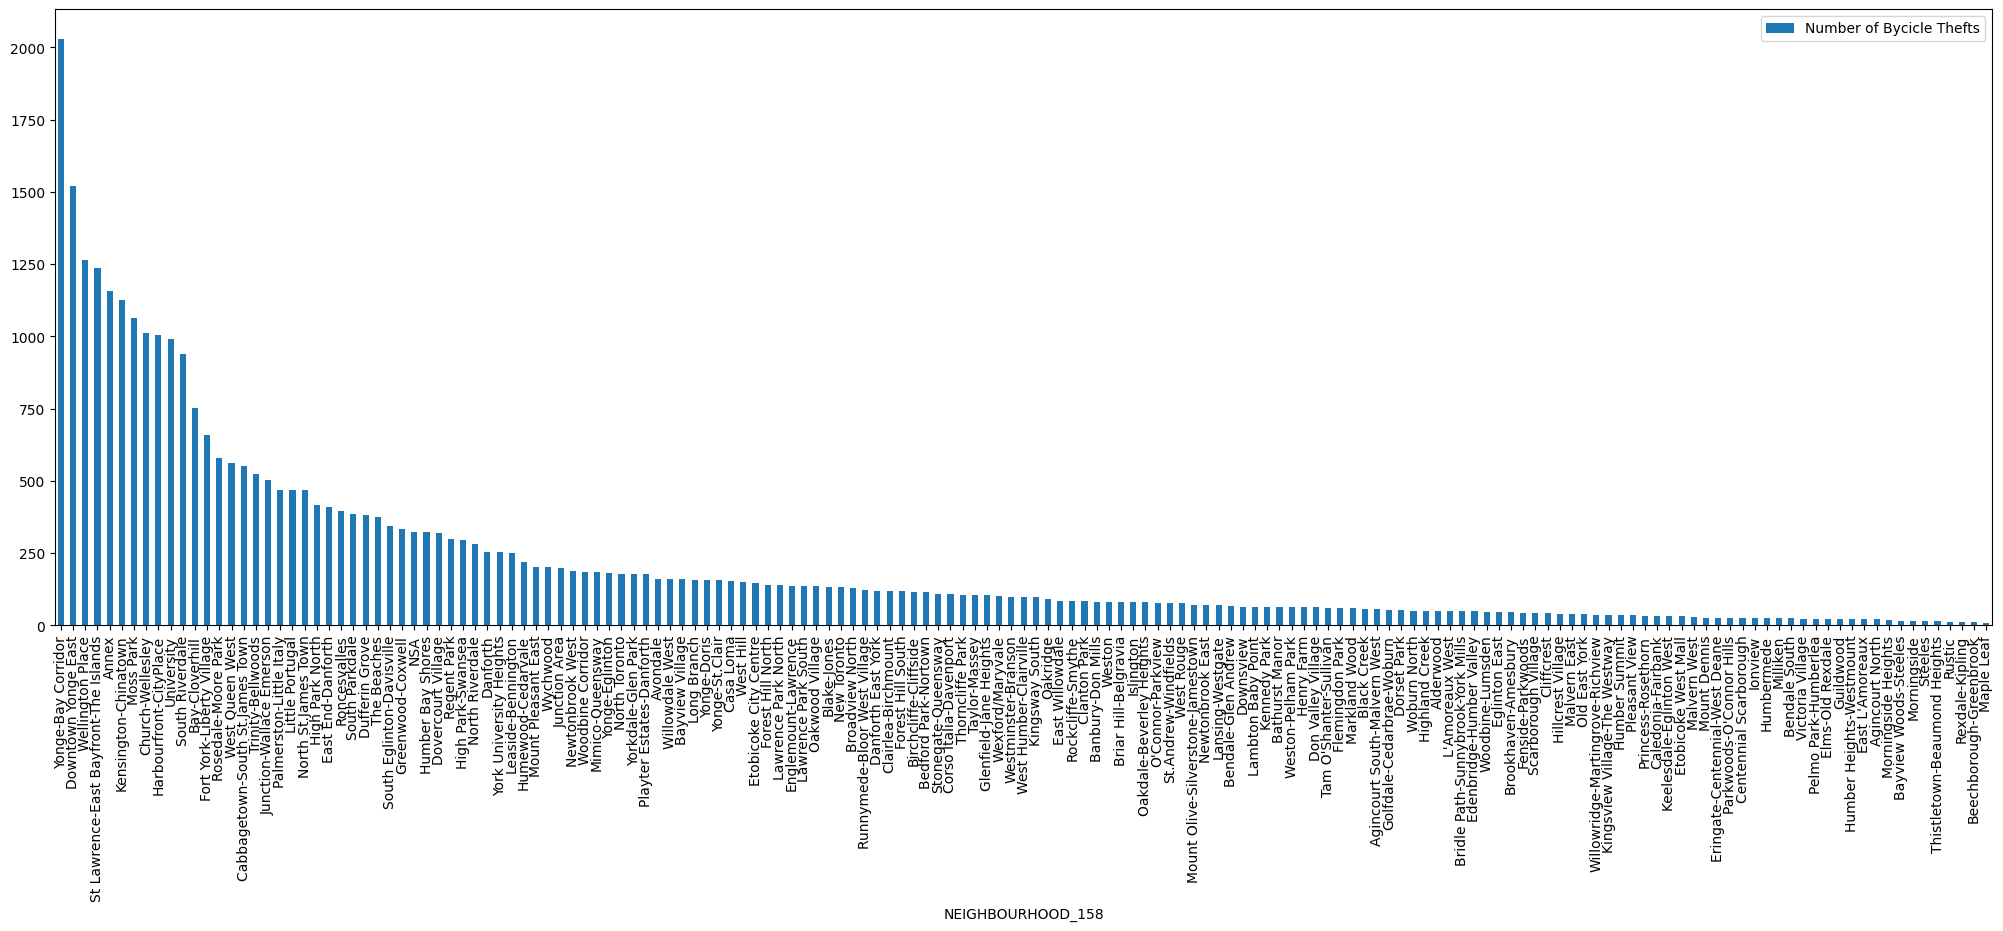

In [ ]:
#plot dataframe
df_Neighbourhood_Bicycle_Thefts_sorted.plot(x="NEIGHBOURHOOD_158",y="Number of Bycicle Thefts",kind='bar',figsize=(25,8),rot=90)
plt.show()

In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted_reset_index=df_Neighbourhood_Bicycle_Thefts_sorted.reset_index()
print(df_Neighbourhood_Bicycle_Thefts_sorted_reset_index)

     index                      NEIGHBOURHOOD_158  Number of Bycicle Thefts  \
0      153                     Yonge-Bay Corridor                      2030   
1       36                    Downtown Yonge East                      1521   
2      138                       Wellington Place                      1265   
3      126  St Lawrence-East Bayfront-The Islands                      1235   
4        3                                  Annex                      1158   
..     ...                                    ...                       ...   
154    133           Thistletown-Beaumond Heights                        15   
155    121                                 Rustic                        13   
156    116                        Rexdale-Kipling                        12   
157     11                Beechborough-Greenbrook                        10   
158     87                             Maple Leaf                         7   

     percentage of bicycle thefts (%)  
0          

In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[0,'percentage of bicycle thefts (%)']

5.920093321668125

In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.shape

(159, 5)

     index                      NEIGHBOURHOOD_158  Number of Bycicle Thefts  \
0      153                     Yonge-Bay Corridor                      2030   
1       36                    Downtown Yonge East                      1521   
2      138                       Wellington Place                      1265   
3      126  St Lawrence-East Bayfront-The Islands                      1235   
4        3                                  Annex                      1158   
..     ...                                    ...                       ...   
154    133           Thistletown-Beaumond Heights                        15   
155    121                                 Rustic                        13   
156    116                        Rexdale-Kipling                        12   
157     11                Beechborough-Greenbrook                        10   
158     87                             Maple Leaf                         7   

     percentage of bicycle thefts (%)  \
0         

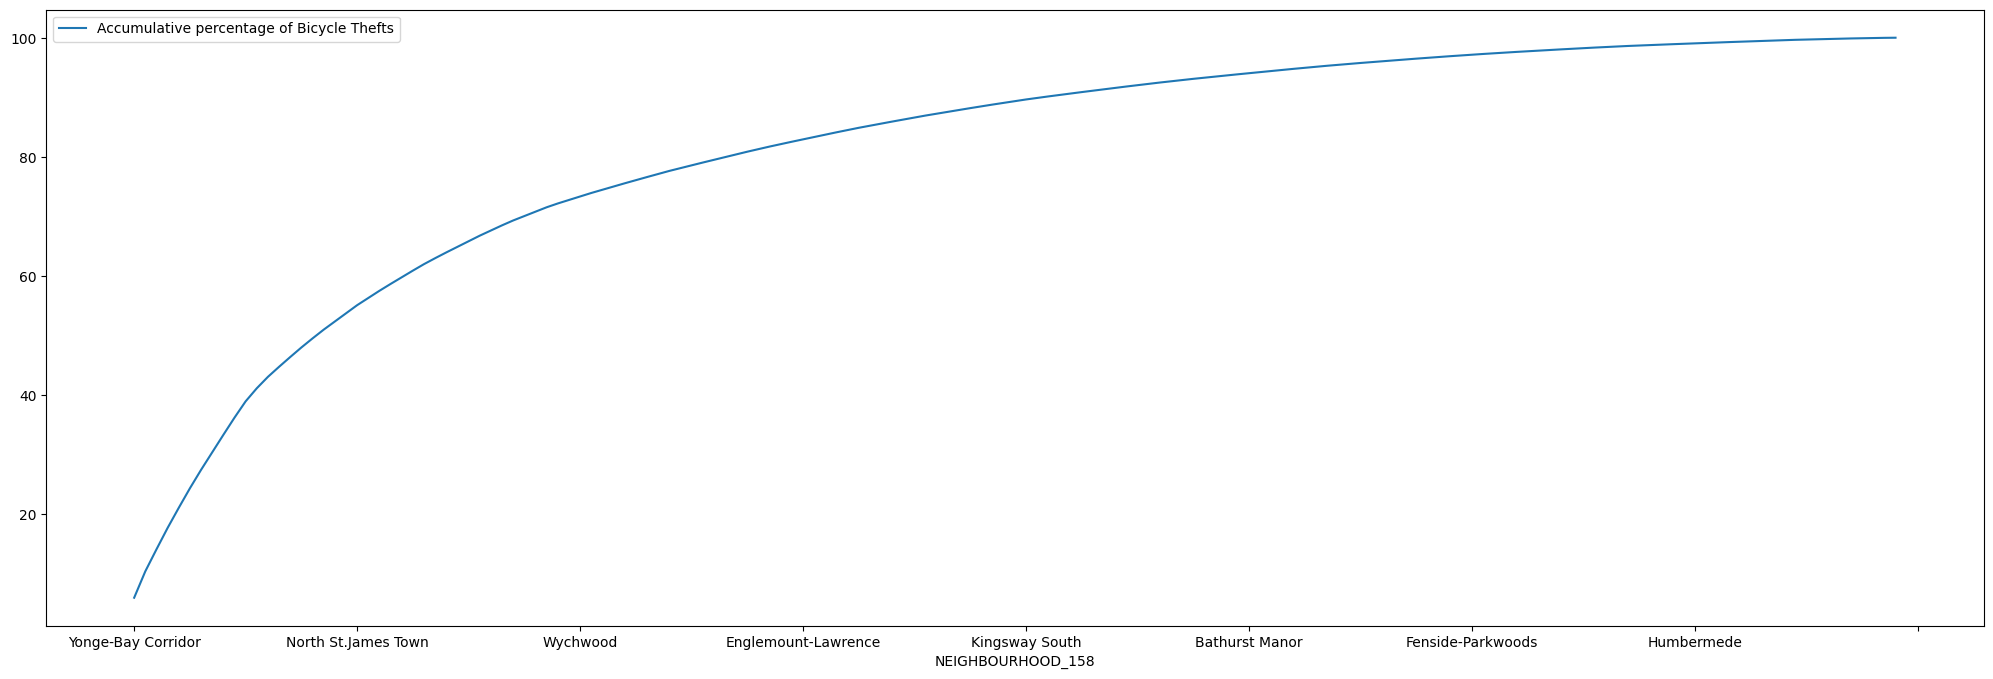

In [ ]:
df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[0,'Accumulative percentage of Bicycle Thefts'] = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[0,'percentage of bicycle thefts (%)']
for i in range(1,df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.shape[0]):
  df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[i, 'Accumulative percentage of Bicycle Thefts'] = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[i, 'percentage of bicycle thefts (%)'] + df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.loc[i-1,'Accumulative percentage of Bicycle Thefts']

print(df_Neighbourhood_Bicycle_Thefts_sorted_reset_index)

df_Neighbourhood_Bicycle_Thefts_sorted_reset_index.plot(x = "NEIGHBOURHOOD_158", y = 'Accumulative percentage of Bicycle Thefts', kind = 'line', figsize=(25,8))
plt.show()

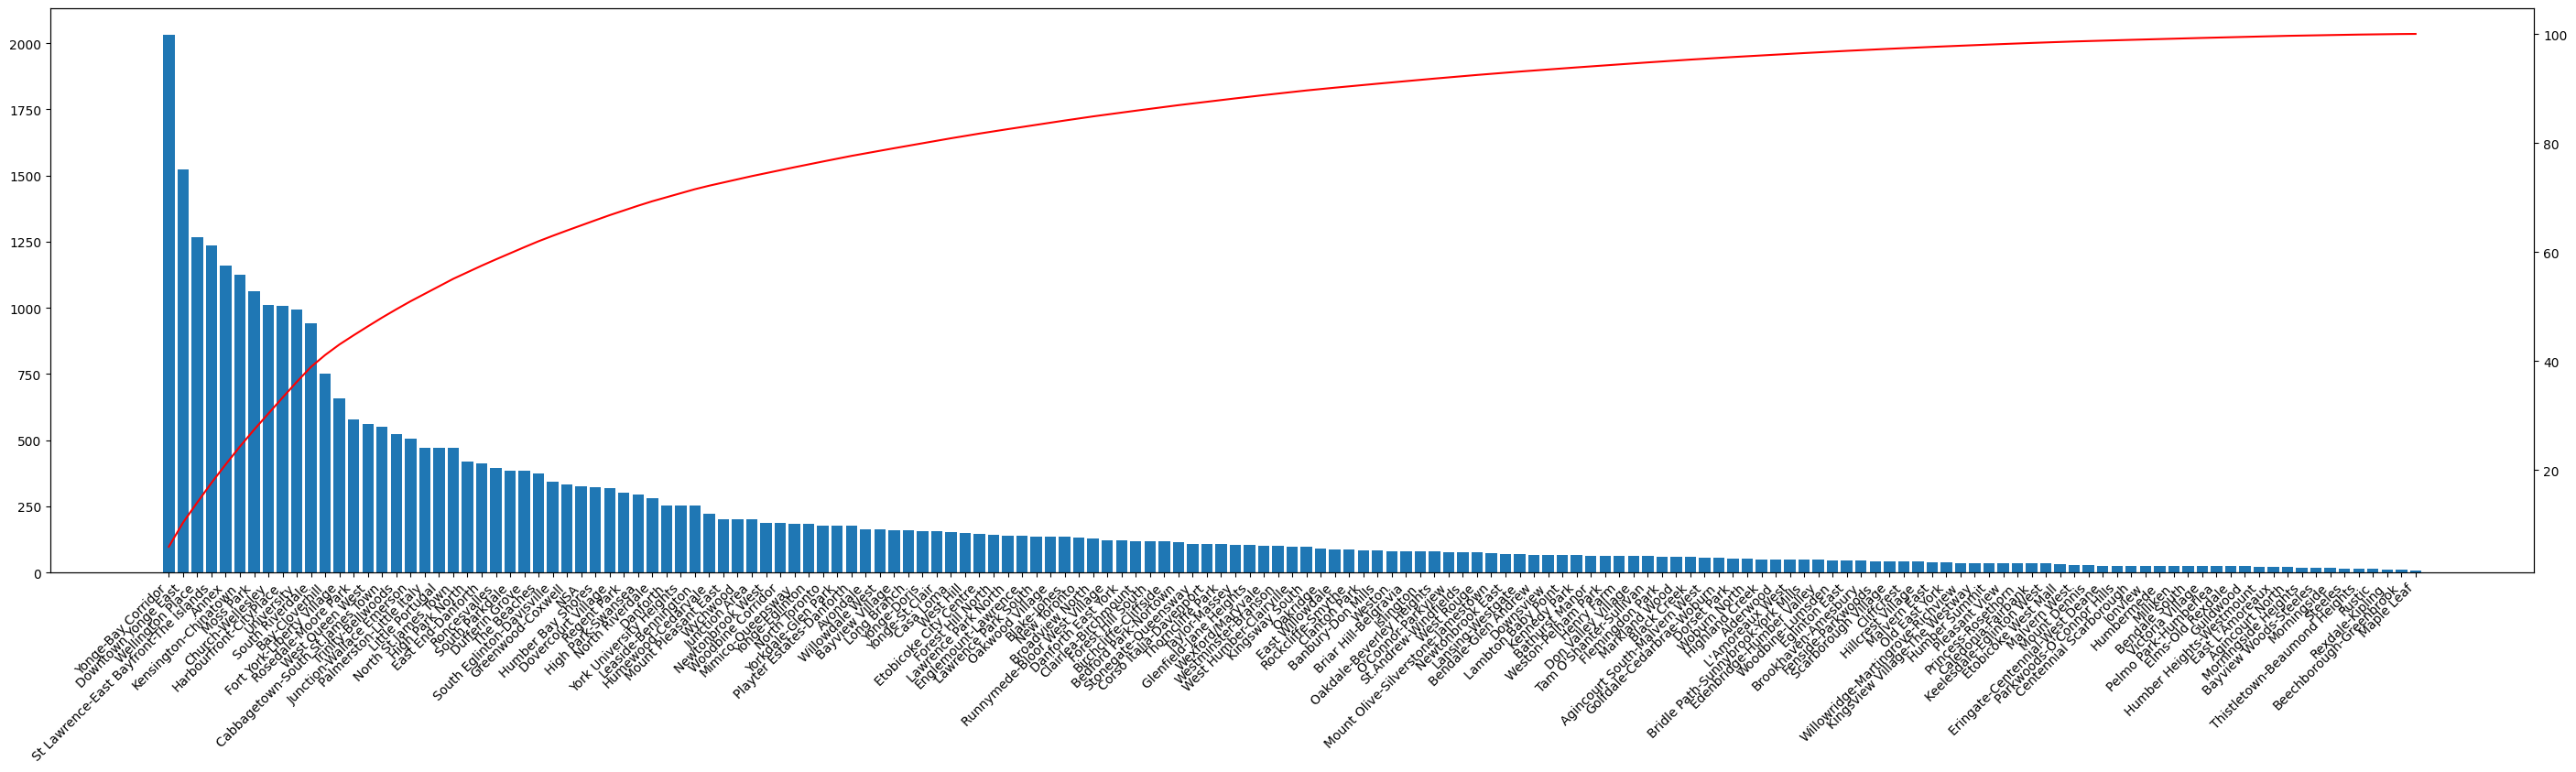

In [ ]:
x = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index['NEIGHBOURHOOD_158']
y1 = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index['Number of Bycicle Thefts']
y2 = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index['Accumulative percentage of Bicycle Thefts']

fig, ax1 = plt.subplots(figsize=(35,8))

ax1.bar(x,y1)
ax2 = ax1.twinx()
ax2.plot(x,y2,'r')

labels = ax1.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.show()

In [ ]:
selected_rows = df_Neighbourhood_Bicycle_Thefts_sorted_reset_index[df_Neighbourhood_Bicycle_Thefts_sorted_reset_index["Accumulative percentage of Bicycle Thefts"] < 80]
print('Unsafe Neigbourhoods for bikes contributing to 80% of incidents: \n',selected_rows['NEIGHBOURHOOD_158'])

Unsafe Neigbourhoods for bikes contributing to 80% of incidents: 
 0                        Yonge-Bay Corridor
1                       Downtown Yonge East
2                          Wellington Place
3     St Lawrence-East Bayfront-The Islands
4                                     Annex
5                      Kensington-Chinatown
6                                 Moss Park
7                          Church-Wellesley
8                    Harbourfront-CityPlace
9                                University
10                          South Riverdale
11                           Bay-Cloverhill
12                Fort York-Liberty Village
13                      Rosedale-Moore Park
14                          West Queen West
15          Cabbagetown-South St.James Town
16                        Trinity-Bellwoods
17                 Junction-Wallace Emerson
18                  Palmerston-Little Italy
19                          Little Portugal
20                      North St.James Town
21       

In [ ]:
df_Neighbourhood_Bicycle_Thefts_geo = df.groupby(['NEIGHBOURHOOD_158']).size().reset_index(name = 'Number of Bycicle Thefts')
df_Neighbourhood_Bicycle_Thefts_geo['Latitude'] = df['LAT_WGS84']
df_Neighbourhood_Bicycle_Thefts_geo['Longitude'] = df['LONG_WGS84']
fig = px.scatter_geo(df_Neighbourhood_Bicycle_Thefts_geo, lat='Latitude', lon='Longitude', size = 'Number of Bycicle Thefts', scope="north america", basemap_visible = True,title= 'Number of Bycicle Thefts since 2014')
fig.show()
#We can zoom in on the image.